<a href="https://colab.research.google.com/github/PournamiN/Data-Science-Project-Series/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install q kaggle

In [ ]:
from google.colab import files
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from google.colab import autoviz
import seaborn as sns

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pournami18","key":"c6cc77c5459154bd5c2fdc27f0ed94ca"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d luisandresgarcia/stock-market-prediction

Dataset URL: https://www.kaggle.com/datasets/luisandresgarcia/stock-market-prediction
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 87% 36.0M/41.5M [00:00<00:00, 84.5MB/s]
100% 41.5M/41.5M [00:00<00:00, 85.8MB/s]


In [ ]:
! unzip /content/stock-market-prediction.zip

Archive:  /content/stock-market-prediction.zip
  inflating: infolimpioavanzadoTarget.csv  


In [ ]:
dataset = pd.read_csv("/content/infolimpioavanzadoTarget.csv", encoding_errors='ignore')

In [ ]:
dataset

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,23.600000,26.223672,27.022465,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,23.610001,30.764722,28.003602,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,23.610001,30.764722,29.251039,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.740000,46.457382,35.995609,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


In [ ]:
dataset.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

In [ ]:
dataset.duplicated().value_counts()

False    7781
Name: count, dtype: int64

In [ ]:
dataset.shape

(7781, 1285)

In [ ]:
dataset = dataset.dropna(axis=1)

In [ ]:
dataset.shape

(7781, 20)

In [ ]:
dataset.head(7)

,date,open,high,low,close,adjclose,volume,ticker,feargreed,emaadjclose5,emaadjclose10,emaadjclose15,emaadjclose50,atr5,atr10,atr15,atr20,velaE,velaF,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,29,0.000000,0.000000,0.000000,0.000000,0.719000,0.719000,0.719000,0.719000,-0.039999,-0.039999,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,23,0.003775,0.004633,0.004955,0.005440,0.713200,0.716100,0.717066,0.717550,-0.040001,-0.040001,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,24,0.030547,0.038221,0.041169,0.045691,0.748560,0.733490,0.728595,0.726172,-0.629999,-0.629999,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,15,0.053506,0.072248,0.079968,0.092363,0.760848,0.741141,0.734022,0.730364,-0.480000,-0.480000,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,18,0.056235,0.084799,0.097642,0.119472,0.740679,0.733027,0.729088,0.726846,-0.509999,-0.509999,0
5,2022-01-10,15.680000,16.010000,15.170000,15.860000,15.860000,116700,ASLE,23,0.030830,0.060987,0.076353,0.104614,0.760543,0.743724,0.736482,0.732503,0.179999,0.179999,0
6,2022-01-11,15.750000,16.500000,15.690000,16.280001,16.280001,85800,ASLE,21,0.002824,0.027503,0.042511,0.073132,0.770434,0.750352,0.741383,0.736378,0.530001,0.530001,0


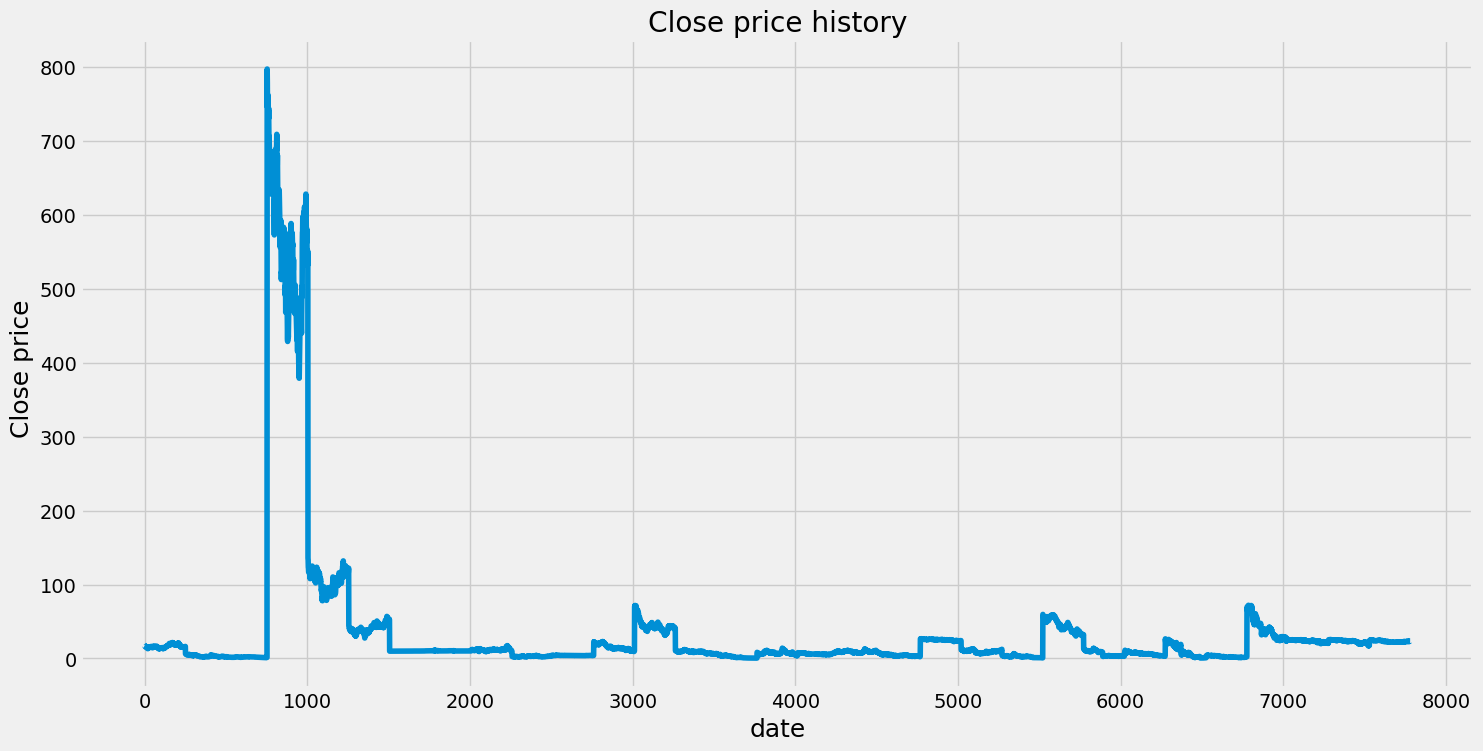

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(dataset['close'])

plt.xlabel('date',fontsize=18)
plt.ylabel('Close price ', fontsize=18)
plt.show()

In [ ]:
data = dataset.filter(['close'])
#convert to numpy array
newdata = data.values
#train
training_data_len= math.ceil(len(newdata) * .8)

training_data_len


6225

In [ ]:
#scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(newdata)

scaled_data

array([[0.0217694 ],
       [0.02164395],
       [0.0207532 ],
       ...,
       [0.02878248],
       [0.02910868],
       [0.02910868]])

In [ ]:
#training data set
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.0217694 , 0.02164395, 0.0207532 , 0.01977463, 0.01919752,
       0.01938571, 0.01991263, 0.01958644, 0.01932298, 0.01904697,
       0.0188086 , 0.01828168, 0.01819386, 0.01756657, 0.01756657,
       0.01734075, 0.01727802, 0.0166131 , 0.01608617, 0.01734075,
       0.01752894, 0.01712747, 0.01641236, 0.01652528, 0.01711493,
       0.01798058, 0.01828168, 0.01864551, 0.01838205, 0.01808095,
       0.01893406, 0.0192728 , 0.01845732, 0.01857024, 0.01915989,
       0.01877097, 0.01894661, 0.01934807, 0.01913479, 0.01899679,
       0.01987499, 0.01913479, 0.01895915, 0.01912225, 0.0189717 ,
       0.01907207, 0.01887133, 0.01811859, 0.0174913 , 0.01858278,
       0.01899679, 0.01958644, 0.02016355, 0.02005063, 0.01959899,
       0.01909716, 0.02002554, 0.01992518, 0.01938571, 0.01946098])]
[0.019109703314620766]

[array([0.0217694 , 0.02164395, 0.0207532 , 0.01977463, 0.01919752,
       0.01938571, 0.01991263, 0.01958644, 0.01932298, 0.01904697,
       0.0188086 , 0.01828168, 0.0

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(6165, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

6165/6165 [==============================] - 214s 34ms/step - loss: 0.0020


In [ ]:
#testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = newdata[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


49/49 [==============================] - 4s 41ms/step


In [ ]:
#RMSE
rmse = np.sqrt( np.mean(predictions - y_test)**2 )
rmse

1.0945663237633003

<ipython-input-39-4713447ffa27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


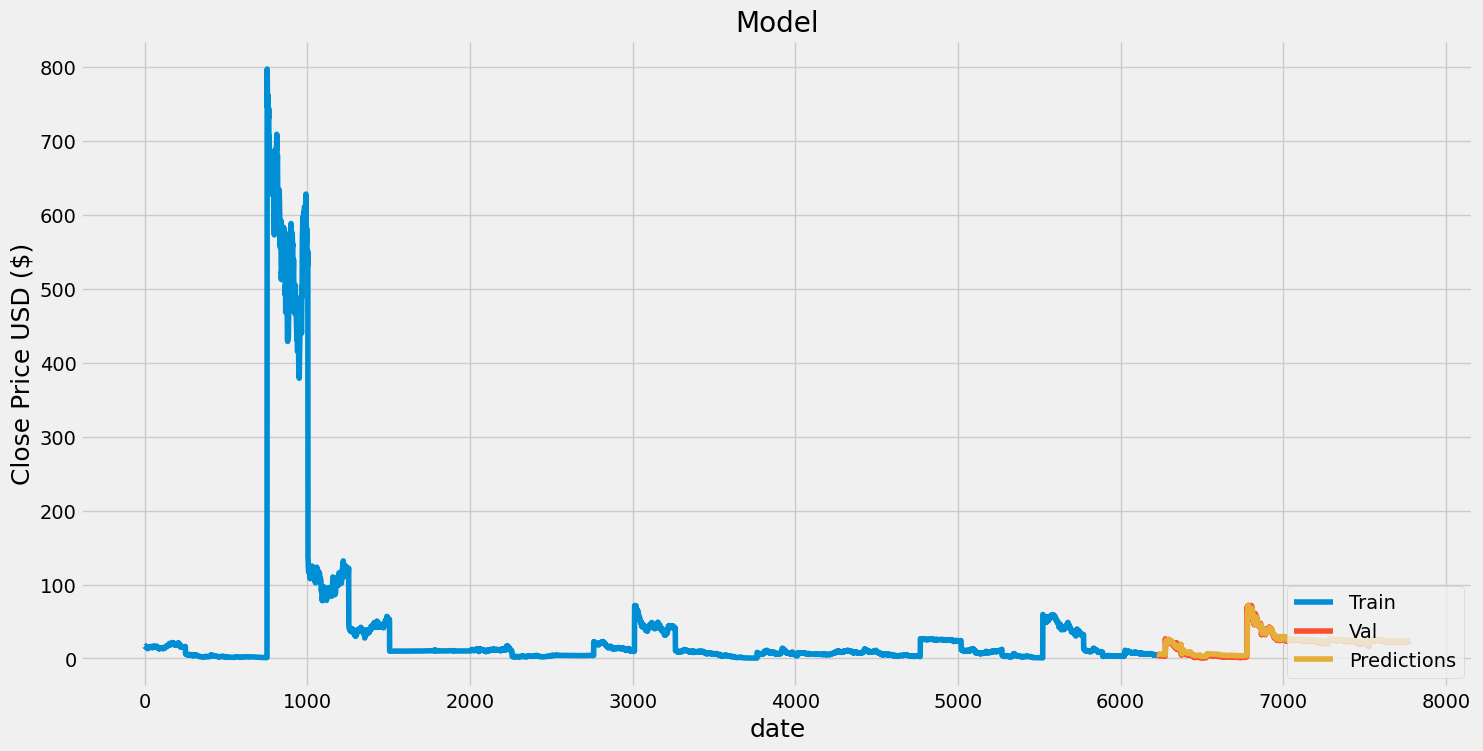

In [ ]:
#plot
train= data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualise
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
#actual and prediction
valid

,close,Predictions
6225,4.300000,6.491674
6226,4.400000,6.447113
6227,4.200000,6.425980
6228,4.300000,6.377061
6229,4.200000,6.348180
...,...,...
7776,23.290001,23.911097
7777,23.350000,24.045044
7778,23.350000,24.157019
7779,23.610001,24.235210


In [ ]:
file_name = 'infolimpioavanzadoTarget.csv'  # replace with your file name
newdata_quote = pd.read_csv(file_name, parse_dates=['Date'], index_col='Date')

# Filter the dataset for the specified date range
start_date = '2012-01-01'
end_date = '2019-12-18'
filtered_dataset = newdata_quote.loc[start_date:end_date]

# Ensure the filtered dataset is not empty
if filtered_df.empty:
    raise ValueError("The filtered dataset is empty. Check your date range or dataset.")

# Select the 'Close' column
new_dataset = filtered_dataset.filter(['Close'])

# Initialize and fit the scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(new_df)

# Extract the last 60 days of the dataset
last_60_days = new_df[-60:].values

# Scale the last 60 days
last_60_days_scaled = scaler.transform(last_60_days)

# Prepare the test data
x_test = []
x_test.append(last_60_days_scaled)
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Load the pre-trained model (assuming it has been saved previously)
model = load_model('path/to/your/trained_model.h5')

# Predict the closing price
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)

# Print the predicted price
print(pred_price)